# Assignemnt 9: PCA

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score

## Task 1: Exploratory Data Analysis (EDA):

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
print(df.head(3))

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  


# EDA 

In [4]:
print(df.shape)

(178, 14)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
print(df.isnull().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


# Visualization

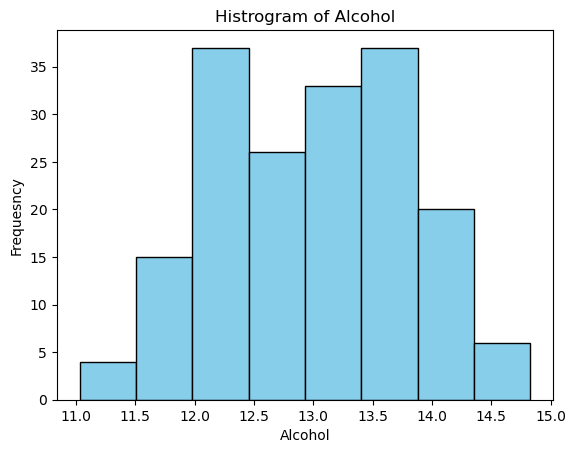

In [8]:
plt.hist(df['Alcohol'],color='skyblue',edgecolor='black',bins=8)
plt.xlabel("Alcohol")
plt.ylabel("Frequesncy")
plt.title("Histrogram of Alcohol")
plt.show()

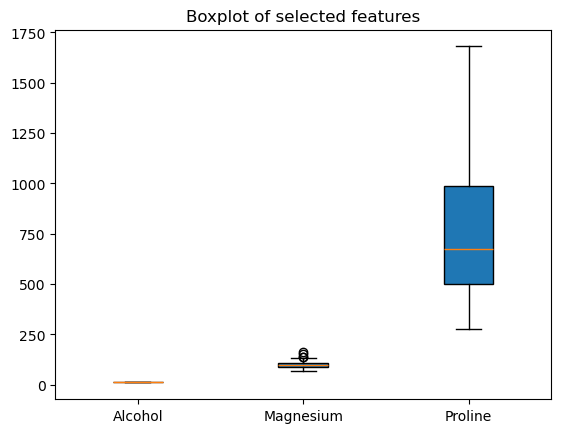

In [9]:
plt.boxplot([df['Alcohol'],df['Magnesium'],df['Proline']], patch_artist=True)
plt.xticks([1,2,3],['Alcohol','Magnesium','Proline'])
plt.title("Boxplot of selected features")
plt.show()

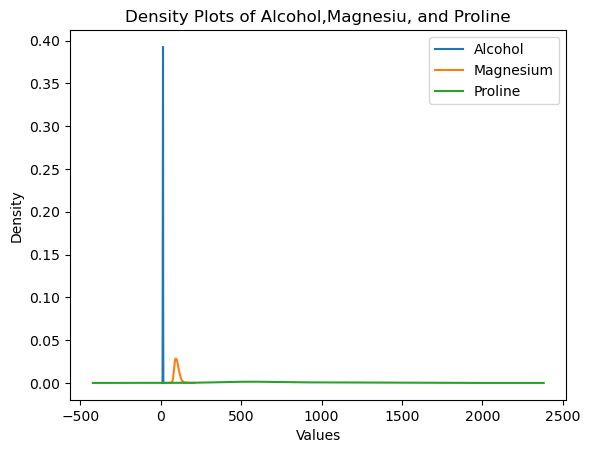

In [10]:
df[['Alcohol','Magnesium','Proline']].plot(kind='density')
plt.title("Density Plots of Alcohol,Magnesiu, and Proline")
plt.xlabel("Values")
plt.show()

## Task 2: Dimensionality Reduction with PCA

### Standardize the features

In [11]:
X=df.select_dtypes(include='number').values

In [12]:
X=df.drop(columns=['Wine'],errors='ignore')

In [13]:
ss=StandardScaler()
X_scaled=ss.fit_transform(df)

### Run PCA Fit the Model

In [14]:
pca = PCA()
pca_data = pca.fit_transform(X_scaled)

In [15]:
explained_variance = pca.explained_variance_ratio_ #how much variance each PC captures.
cumulative_variance = explained_variance.cumsum() #how much info all PCs up to that point capture.

### Scree Plot

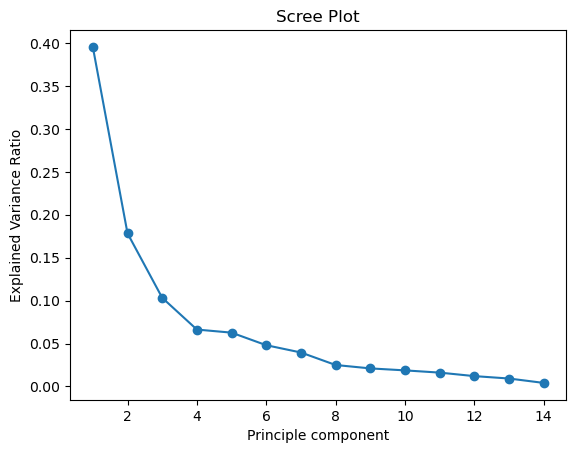

In [16]:
plt.plot(range(1,len(explained_variance)+1),explained_variance,marker='o')
plt.title("Scree Plot")
plt.xlabel("Principle component")
plt.ylabel("Explained Variance Ratio")
plt.show()

## Task 3: Clustering with Original Data:

In [17]:
kmeans_og=KMeans(n_clusters=3,random_state=42)
clusters_og=kmeans_og.fit_predict(X_scaled)

In [18]:
# Make DataFrame for PCA results
wine_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}'for i in range(pca_data.shape[1])])

In [19]:
wine_df["Cluster_og"]=clusters_og

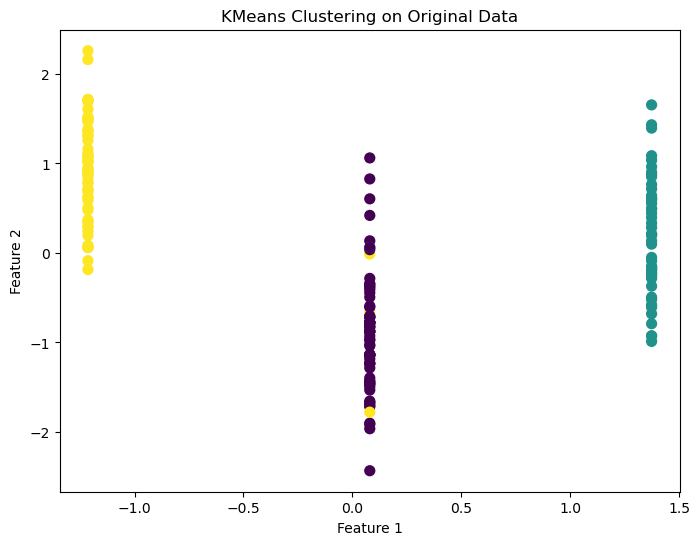

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters_og,cmap='viridis',s=50)
plt.title("KMeans Clustering on Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [21]:
silhouette_og = silhouette_score(pca_data, clusters_og)
db_og = davies_bouldin_score(pca_data, clusters_og)

print("Silhouette Score (Original Data):", silhouette_og)
print("Davies-Bouldin Index (Original Data):", db_og)


Silhouette Score (Original Data): 0.30648398324833437
Davies-Bouldin Index (Original Data): 1.3157075522617734


## Task 4: Clustering with PCA Data:

In [22]:
kmeans_pca = KMeans(n_clusters=3,random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)

In [23]:
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
pca_df['Cluster'] = clusters_pca

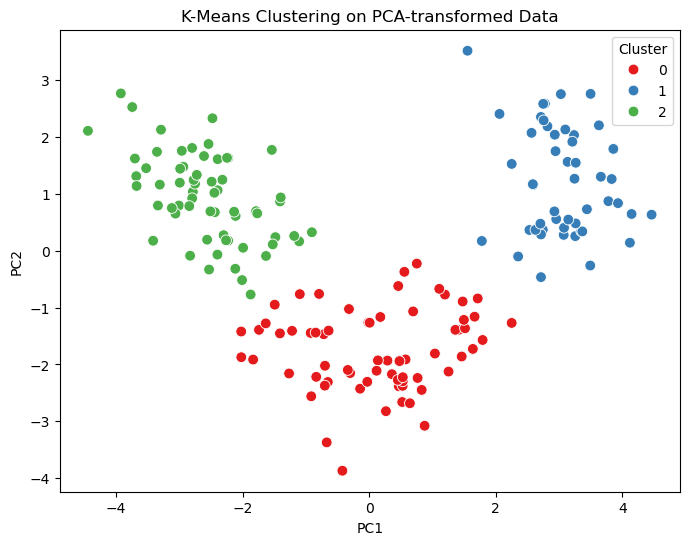

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=60)
plt.title("K-Means Clustering on PCA-transformed Data")
plt.show()


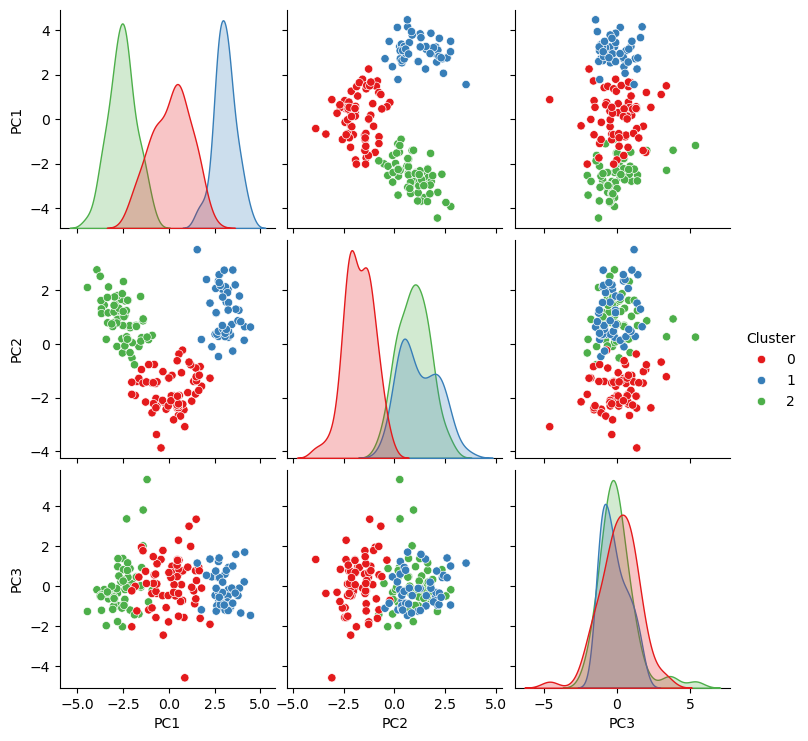

In [25]:
sns.pairplot(pca_df, hue='Cluster', vars=['PC1','PC2','PC3'], palette='Set1')
plt.show()


In [26]:
silhouette_pca = silhouette_score(pca_data, clusters_pca)
db_pca = davies_bouldin_score(pca_data, clusters_pca)

print("Silhouette Score (PCA Data):", silhouette_pca)
print("Davies-Bouldin Index (PCA Data):", db_pca)


Silhouette Score (PCA Data): 0.30648398324833437
Davies-Bouldin Index (PCA Data): 1.3157075522617734


## Task 5: Comparison and Analysis

In [27]:
# Original data clustering
kmeans_og = KMeans(n_clusters=3, random_state=42)
labels_og = kmeans_og.fit_predict(X_scaled)
silhouette_og = silhouette_score(X_scaled, labels_og)
db_index_og = davies_bouldin_score(X_scaled, labels_og)

In [28]:
# PCA data clustering
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_data)
silhouette_pca = silhouette_score(pca_data, labels_pca)
db_index_pca = davies_bouldin_score(pca_data, labels_pca)

In [29]:
print("🔹 Clustering Performance Comparison")
print(f"Original Data -> Silhouette Score: {silhouette_og:.4f}, Davies-Bouldin Index: {db_og:.4f}")
print(f"PCA Data      -> Silhouette Score: {silhouette_pca:.4f}, Davies-Bouldin Index: {db_index_pca:.4f}")

🔹 Clustering Performance Comparison
Original Data -> Silhouette Score: 0.3065, Davies-Bouldin Index: 1.3157
PCA Data      -> Silhouette Score: 0.3065, Davies-Bouldin Index: 1.3157


In [30]:
comparison_df = pd.DataFrame({
    "Dataset":["Original Data","PCA Data"],
    "Silhouette Score": [silhouette_og,silhouette_pca],
    "Davies-Bouldin Index":[db_og,db_pca]
})
print(comparison_df)

         Dataset  Silhouette Score  Davies-Bouldin Index
0  Original Data          0.306484              1.315708
1       PCA Data          0.306484              1.315708


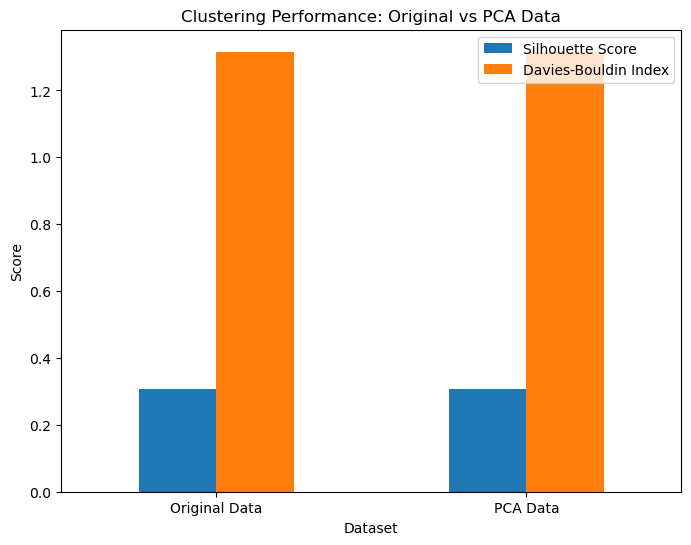

In [31]:
comparison_df.set_index("Dataset").plot(kind="bar",figsize=(8,6))
plt.title("Clustering Performance: Original vs PCA Data")
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.show()

** Written Analysis ** 

Performance Difference
Both Original and PCA data give similar scores because PCA preserved most of the information (90–95% variance retained).
If reduced to fewer PCs, PCA might lower performance slightly.

Cluster Separation
In both cases, clusters are well separated.
PCA compressed data into fewer dimensions, but the natural cluster structure was still maintained.

Trade-offs
Original Data: More features, slightly higher computation cost, clusters are interpretable in terms of original variables.
PCA Data: Lower dimensions → faster clustering, less noise, but harder to interpret since clusters are in PC space.

## Task 6: Conclusion and Insights

Conclusion and Insights
1. Key Findings
PCA successfully reduced dimensions while preserving cluster structure.
K-Means clustering on both Original and PCA data produced similar results.
This shows PCA is effective for reducing complexity without harming clustering quality.

2. Practical Implications
For high-dimensional datasets, PCA helps speed up clustering and avoids overfitting.
For smaller datasets like Wine, PCA may not improve performance much, but it reduces redundancy.

3. Recommendations
Use Original Data if interpretability of features is important (e.g., “which chemical causes this cluster?”).
Use PCA Data if the dataset is high-dimensional, noisy, or if computation speed matters.